In [1]:
!ls 

bandimportance2.svg   distributions.png        pixelgradientsleft.svg
bandimportance.svg    distributions.svg        pixelgradientsright.svg
BaselineModels.ipynb  FeatureImportance.ipynb  regionlabels.svg
Biermann2020	      LabelAnalysis.ipynb      Regions.ipynb
Biermann2020.ipynb    Models.ipynb	       regions.svg


In [1]:
import glob
import os
import sys
import torch
import pandas as pd
sys.path.append("../code")

In [2]:
root = "/dataserver/marcrusswurm/floatingobjects"
root = "/ssd/floatingObjects/models"

In [6]:

from data import FloatingSeaObjectDataset, allregions, get_region_split
ds = FloatingSeaObjectDataset("/ssd/floatingObjects/data", fold="train", seed=0)

In [7]:
get_region_split(seed=0)

{'train': ['biscay_20180419',
  'mandaluyong_20180314',
  'sandiego_20180804',
  'vungtau_20180423',
  'kolkata_20201115',
  'toledo_20191221',
  'lagos_20200505',
  'venice_20180630',
  'venice_20180928'],
 'val': ['panama_20190425', 'accra_20181031', 'riodejaneiro_20180504'],
 'test': ['danang_20181005', 'longxuyen_20181102', 'lagos_20190101']}

array(['panama_20190425', 'accra_20181031', 'riodejaneiro_20180504'],
      dtype='<U21')

In [4]:
logs = []
models = glob.glob(os.path.join(root,"*","*.pth.tar"))
for snapshotpath in models:
    log = pd.DataFrame(torch.load(snapshotpath)["logs"])
    log["model"] = os.path.basename(snapshotpath)
    log["seed"] = os.path.dirname(snapshotpath).split("/")[-1]
    logs.append(log)
alllogs = pd.concat(logs)

In [5]:
alllogs.sort_values(by="kappa", ascending=False)

,epoch,trainloss,valloss,precision,recall,fscore,kappa,model,seed
8,9,0.351518,1.083442,0.844523,0.781887,0.808846,0.645877,unet-posweight10-lr01-aug1.pth.tar,3
8,9,0.361270,0.797678,0.712736,0.743676,0.724285,0.581478,unet-posweight10-lr01-aug2.pth.tar,0
6,7,0.387309,0.744989,0.720416,0.782545,0.745376,0.560418,unet-posweight10-lr01-aug2.pth.tar,0
36,37,0.262645,0.724222,0.690349,0.815476,0.732487,0.550828,resnetunetscse-posweight10-lr01-aug2.pth.tar,0
9,10,0.377918,0.876327,0.707328,0.796119,0.741180,0.533108,resnetunetscse-posweight10-lr01-aug2.pth.tar,0
...,...,...,...,...,...,...,...,...,...
7,8,0.455923,2.133814,0.470683,0.489309,0.479794,-0.050985,manet-posweight10-lr01-aug2r.pth.tar,0
1,2,0.459747,1.717076,0.470921,0.489532,0.480028,-0.051746,resnetunetscse-posweight10-lr01-aug2.pth.tar,0
20,21,0.416046,1.849154,0.473024,0.490624,0.481128,-0.056108,manet-posweight10-lr01-aug2r.pth.tar,0
3,4,0.324719,1.003703,0.471675,0.489926,0.480384,-0.059251,manet-posweight5-lr01-aug2r.pth.tar,0


In [6]:
alllogs.groupby(["model","seed"]).kappa.max().sort_values(ascending=False)

model                                                 seed
unet-posweight10-lr01-aug1.pth.tar                    3       0.645877
unet-posweight10-lr01-aug2.pth.tar                    0       0.581478
resnetunetscse-posweight10-lr01-aug2.pth.tar          0       0.550828
manet-posweight10-lr01-aug2.pth.tar                   0       0.524210
resnetunetscse-posweight10-lr01-aug1-scratch.pth.tar  0       0.503562
resnetunet-posweight10-lr01-aug2.pth.tar              0       0.493516
resnetunetscse-posweight10-lr01-aug1.pth.tar          3       0.429942
manet-posweight10-lr001-aug2r.pth.tar                 0       0.369588
manet-posweight10-lr01-aug2r.pth.tar                  0       0.306415
unet-posweight10-lr01-aug2.pth.tar                    1       0.236121
manet-posweight5-lr01-aug2r.pth.tar                   0       0.226403
resnetunet-posweight10-lr01-aug2.pth.tar              1       0.220253
unet-posweight10-lr01-aug1.pth.tar                    2       0.194307
resnetunetscse-pos

In [7]:

alllogs.groupby(["model","seed"]).valloss.min().sort_values(ascending=True)

model                                                 seed
manet-posweight5-lr01-aug2r.pth.tar                   1       0.101017
unet-posweight10-lr01-aug2.pth.tar                    1       0.122256
manet-posweight10-lr01-aug2.pth.tar                   1       0.132318
resnetunet-posweight10-lr01-aug2.pth.tar              1       0.133982
manet-posweight10-lr01-aug2r.pth.tar                  1       0.141639
manet-posweight10-lr001-aug2r.pth.tar                 1       0.157556
resnetunetscse-posweight10-lr01-aug2.pth.tar          1       0.162844
unet-posweight10-lr01-aug1.pth.tar                    5       0.186521
resnetunetscse-posweight10-lr01-aug1.pth.tar          5       0.205710
                                                      4       0.206101
unet-posweight10-lr01-aug1.pth.tar                    2       0.217514
                                                      4       0.237797
resnetunetscse-posweight10-lr01-aug1-scratch.pth.tar  0       0.509996
unet-posweight10-l

In [31]:
a = alllogs.model == "unet-posweight10-lr01-aug1.pth.tar"
b = alllogs.model == "unet-posweight10-lr01-aug2.pth.tar"

unet = alllogs.loc[a | b]

In [32]:
unet.groupby("seed").max()

,epoch,trainloss,valloss,precision,recall,fscore,kappa,model
seed,,,,,,,,
0,20,0.477448,1.910028,0.818643,0.873868,0.773041,0.581478,unet-posweight10-lr01-aug2.pth.tar
1,50,0.525572,0.447001,0.657470,0.804772,0.609241,0.236121,unet-posweight10-lr01-aug2.pth.tar
2,40,0.564259,0.619651,0.555248,0.790846,0.581808,0.194307,unet-posweight10-lr01-aug1.pth.tar
3,27,0.493843,1.546663,0.861104,0.871463,0.808846,0.645877,unet-posweight10-lr01-aug1.pth.tar
4,31,0.733802,0.342874,0.674266,0.601434,0.573548,0.131283,unet-posweight10-lr01-aug1.pth.tar
5,38,0.477801,0.878231,0.551816,0.691885,0.550713,0.156110,unet-posweight10-lr01-aug1.pth.tar


In [152]:
from model import get_model

In [174]:
unet = get_model("unet")

In [175]:
unet.load_state_dict(torch.load("/ssd/floatingObjects/models/2/unet-posweight10-lr01-aug1.pth.tar")["model_state_dict"])

<All keys matched successfully>

In [176]:
from data import FloatingSeaObjectDataset
from transforms import get_transform
test_dataset = FloatingSeaObjectDataset("/ssd/floatingObjects/data", fold="test", transform=get_transform("test"),
                                         output_size=128, seed=2, hard_negative_mining=False)


In [177]:
x,y,fid = test_dataset[200]

In [178]:
y_pred = unet(torch.tensor(x).unsqueeze(0)).squeeze()

In [179]:
predictions = torch.sigmoid(y_pred.squeeze()) > 0.5

In [180]:
y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [184]:
from sklearn.metrics import jaccard_score as jsc
print(jsc(y.view(-1),predictions.view(-1)))

0.06999485331960885


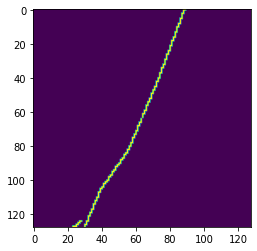

In [182]:
import matplotlib.pyplot as plt
plt.imshow(y)

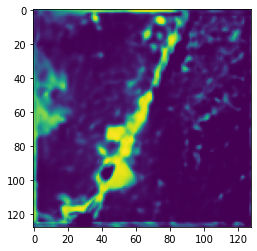

In [183]:
plt.imshow(torch.sigmoid(y_pred.squeeze()).detach())